<a href="https://colab.research.google.com/github/juhumkwon/Defense_Cloud/blob/main/A_12_0_3_3_image_segmentation(MNIST_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 273s 319ms/step - accuracy: 0.9707 - loss: 0.1042 - val_accuracy: 0.9913 - val_loss: 0.0220
Epoch 2/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 316s 313ms/step - accuracy: 0.9931 - loss: 0.0183 - val_accuracy: 0.9962 - val_loss: 0.0112
Epoch 3/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 320s 310ms/step - accuracy: 0.9970 - loss: 0.0094 - val_accuracy: 0.9981 - val_loss: 0.0062
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


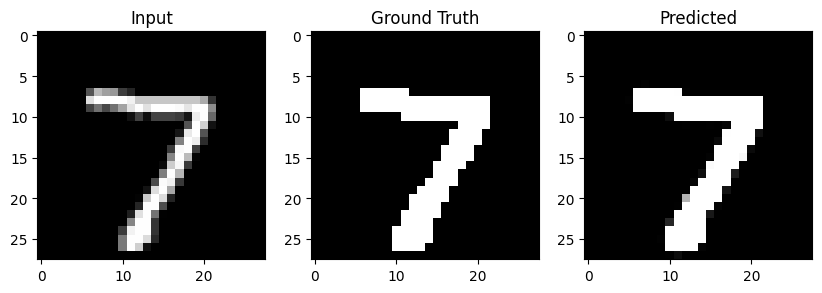

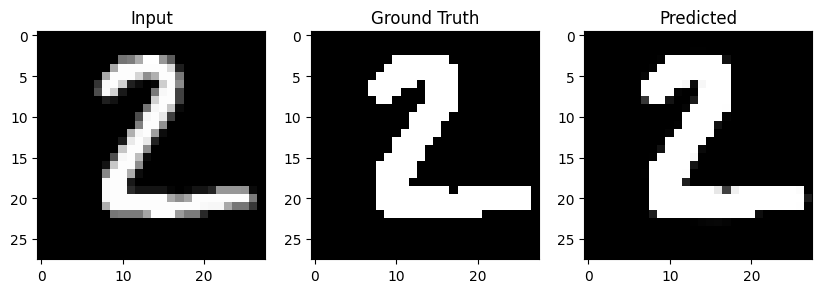

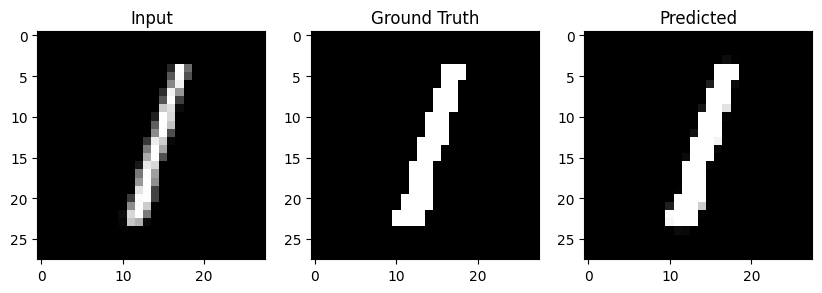

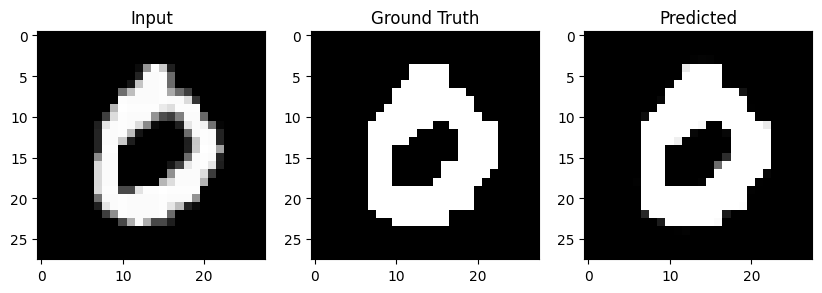

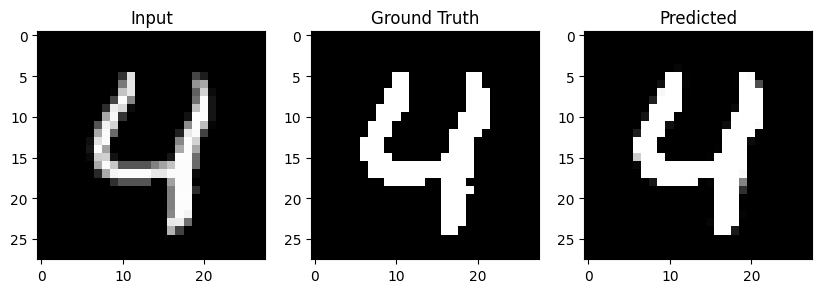

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 준비
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train[..., np.newaxis] / 255.0
x_test = x_test[..., np.newaxis] / 255.0
y_train_mask = (x_train > 0).astype(np.float32)
y_test_mask = (x_test > 0).astype(np.float32)

# 2. 간단한 U-Net 구조 정의
def get_simple_unet(input_shape=(28, 28, 1)):
    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.layers.Conv2D(32, 3, activation="relu", padding="same")(inputs)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = tf.keras.layers.UpSampling2D()(x)
    x = tf.keras.layers.Conv2D(32, 3, activation="relu", padding="same")(x)
    outputs = tf.keras.layers.Conv2D(1, 1, activation="sigmoid", padding="same")(x)
    return tf.keras.Model(inputs, outputs)

# 3. 모델 컴파일 및 학습
model = get_simple_unet()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train_mask, epochs=3, batch_size=64, validation_split=0.1)

# 4. 예측 및 시각화
pred_mask = model.predict(x_test[:5])
for i in range(5):
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 3, 1)
    plt.title("Input")
    plt.imshow(x_test[i].squeeze(), cmap="gray")
    plt.subplot(1, 3, 2)
    plt.title("Ground Truth")
    plt.imshow(y_test_mask[i].squeeze(), cmap="gray")
    plt.subplot(1, 3, 3)
    plt.title("Predicted")
    plt.imshow(pred_mask[i].squeeze(), cmap="gray")
    plt.show()
